In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


C:\Users\devdn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8680 - loss: 0.4370 - val_accuracy: 0.9820 - val_loss: 0.0626
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9815 - loss: 0.0588 - val_accuracy: 0.9878 - val_loss: 0.0445
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9873 - loss: 0.0401 - val_accuracy: 0.9887 - val_loss: 0.0404
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9897 - loss: 0.0302 - val_accuracy: 0.9898 - val_loss: 0.0386
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9925 - loss: 0.0239 - val_accuracy: 0.9913 - val_loss: 0.0342
313/313 - 1s - 2ms/step - accuracy: 0.9892 - loss: 0.0343
Test accuracy: 0.9892


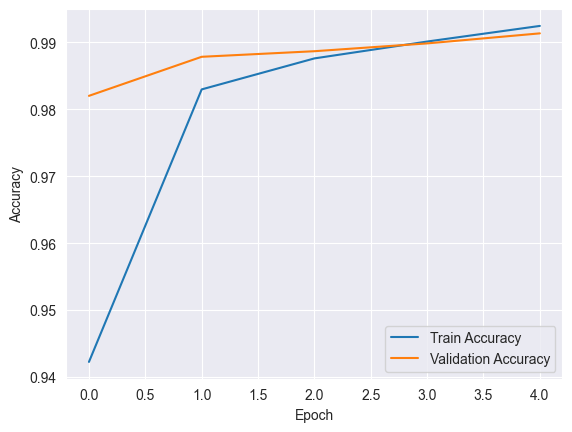

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize pixel values (convert to range [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0
# Reshape to add a channel dimension (needed for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Define the CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax') # 10 classes (digits 0-9)
])
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
